<center>

# Predicción de aprobacion de un préstamo

</center>

##  Introducción

*Aquí va la introducción. Se redacta cuando el proyecto esté listo.*

##  Antecedentes

En el ámbito de los servicios financieros, las entidades bancarias y crediticias deben evaluar cuidadosamente a los solicitantes de préstamos para tomar decisiones informadas sobre su aprobación. Diversas variables relacionadas con las características personales, laborales y financieras de los solicitantes influyen directamente en la probabilidad de que un préstamo sea aprobado. Factores como el ingreso mensual, el historial crediticio, el estado civil, el tipo de empleo, el monto solicitado y el número de dependientes pueden tener un impacto significativo en la decisión final.

Con base en esta información, las instituciones financieras buscan optimizar sus procesos de evaluación de riesgo crediticio. Para ello, recurren al uso de técnicas de Machine Learning, que permiten construir modelos predictivos capaces de estimar la probabilidad de aprobación de un préstamo a partir de las características del solicitante. Esto no solo mejora la eficiencia operativa, sino que también contribuye a una asignación más justa y precisa del crédito.

## Definición del problema

Las entidades financieras que otorgan préstamos personales enfrentan el desafío de estimar con precisión la probabilidad de aprobación de una solicitud de crédito. Si bien existen múltiples factores que pueden influir en esta decisión como el ingreso del solicitante, su historial crediticio, el monto del préstamo solicitado o el número de dependientes no siempre es evidente cuáles son los más determinantes ni cómo interactúan entre sí. Esta falta de claridad, junto con la ausencia de insumos analíticos confiables para medir el riesgo del préstamo, complica significativamente la labor de estas instituciones. En particular, dificulta la evaluación precisa del riesgo crediticio, la asignación eficiente del crédito y la personalización adecuada de productos financieros, lo que puede derivar en decisiones erróneas, aumento de la morosidad y pérdida de competitividad en el mercado. 


## Justificación 

El desarrollo de un modelo predictivo que analice los factores personales y financieros de los solicitantes que tienen mayor influencia en la aprobación de préstamos, representa una herramienta de gran valor estratégico para las instituciones financieras. Al identificar con mayor precisión las variables más determinantes en la decisión crediticia, este tipo de modelo facilita los procesos de evaluación del riesgo, permitiendo una asignación de crédito más informada y eficiente. 

Además, la capacidad de predecir el riesgo asociado a cada solicitud facilita la creación de productos crediticios más personalizados, justos y alineados con el perfil de cada cliente, mejorando tanto la experiencia del usuario como la rentabilidad de la entidad. De esta manera, se promueve una toma de decisiones más estratégica y basada en datos, lo cual es fundamental en un entorno financiero cada vez más competitivo y orientado a la gestión proactiva del riesgo. 



## Objetivo general

Desarrollar un modelo de aprendizaje automático que prediga la aprobación o rechazo de una solicitud de préstamo personal, con el fin de apoyar a las instituciones financieras en la toma de decisiones estratégicas relacionadas con la evaluación de riesgos, la asignación de crédito y la personalización de productos financieros, basándose en las características personales, laborales y financieras de los solicitantes.

### Objetivos específicos

- Realizar un análisis exploratorio del conjunto de datos de Loan Status Prediction para depurar datos, identificar patrones y relaciones entre las variables.
- Entrenar modelos predictivos utilizando algoritmos de regresión para encontrar la variable objetivo Loan_Status: Loan approved (Y/N).
- Evaluar el rendimiento de los modelos para medir la precisión de las predicciones y seleccionar el que tenga el mejor desempeño.
- Realizar la optimización de hiperparámetros del modelo selecionado para mejorar su rendimiento.
- Desarrollar un sistema automatizado que permita utilizar las predicciones del modelo para predecir la variable objetivo Loan_Status: Loan approved (Y/N).



## Descripción del conjunto de datos
Este conjunto de datos disponible en Kaggle contiene información sobre solicitudes de préstamos personales y cada fila representa a un solicitante, incluyendo datos como:
- El ingreso del solicitante y ingreso del co-solicitante
- El monto del préstamo
- El historial crediticio, el estado civil y el tipo de empleo
- El estado del préstamo (aprobado o rechazado)
Este dataset nos permite analizar qué características influyen más en la aprobación de un préstamo personal.

## Características del Dataset
- Datos numéricos: Tiene números como el ingreso del solicitante, el ingreso del co-solicitante, el monto del préstamo y el historial crediticio.
- Datos categóricos: Incluye cosas como el estado civil, el tipo de empleo y el estado del préstamo (aprobado/rechazado).
- Variedad de datos: Es un dataset que mezcla datos fáciles de organizar (como números y categorías) con otros más variados como características personales, lo que lo hace interesante para analizar desde diferentes perspectivas.

### Resumen:
- Loan_ID: Identificador único del préstamo. (Cadena de texto)
- Gender: Género del solicitante (Male/Female). (Cadena de texto)
- Married: Estado civil (Yes/No). (Cadena de texto)
- Dependents: Número de personas dependientes. (Cadena de texto o entero)
- Education: Nivel educativo (Graduate/Not Graduate). (Cadena de texto)
- Self_Employed: Trabajador independiente (Yes/No). (Cadena de texto)
- ApplicantIncome: Ingreso del solicitante. (Entero)
- CoapplicantIncome: Ingreso del co-solicitante. (Entero)
- LoanAmount: Monto del préstamo (en miles). (Decimal)
- Loan_Amount_Term: Plazo del préstamo (en meses). (Entero)
- Credit_History: Historial crediticio (1 = cumple, 0 = no cumple). (Entero)
- Property_Area: Zona de residencia (Urban/Semiurban/Rural). (Cadena de texto)
- Employment_Type: Tipo de empleo. (Cadena de texto)
- Loan_Status: Estado del préstamo (Y = Aprobado, N = Rechazado). (Cadena de texto - variable objetivo) >> Variable objetivo


## Tamaño del Dataset
- 614 registros (solicitantes de préstamos)
- 13 columnas con distintas características personales y financieras 

## Limitaciones
- No incluye información detallada sobre el historial crediticio
- Puede haber sesgos en la distribución de datos (por ejemplo, más solicitantes aprobados que rechazados)
- No se especifica el año de recolección de los datos, lo que limita el análisis temporal

## Acceso al Dataset
El conjunto de datos está disponible públicamente en la plataforma Kaggle, bajo el nombre "Loan Status Prediction Dataset".
Enlace: https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction


## Muestra del Dataset

In [1]:
import sys
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para crear el transformador de clusters
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import OneHotEncoder
 

In [2]:
prestamos = pd.read_csv('loan_data.csv')

In [3]:
prestamos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
prestamos.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


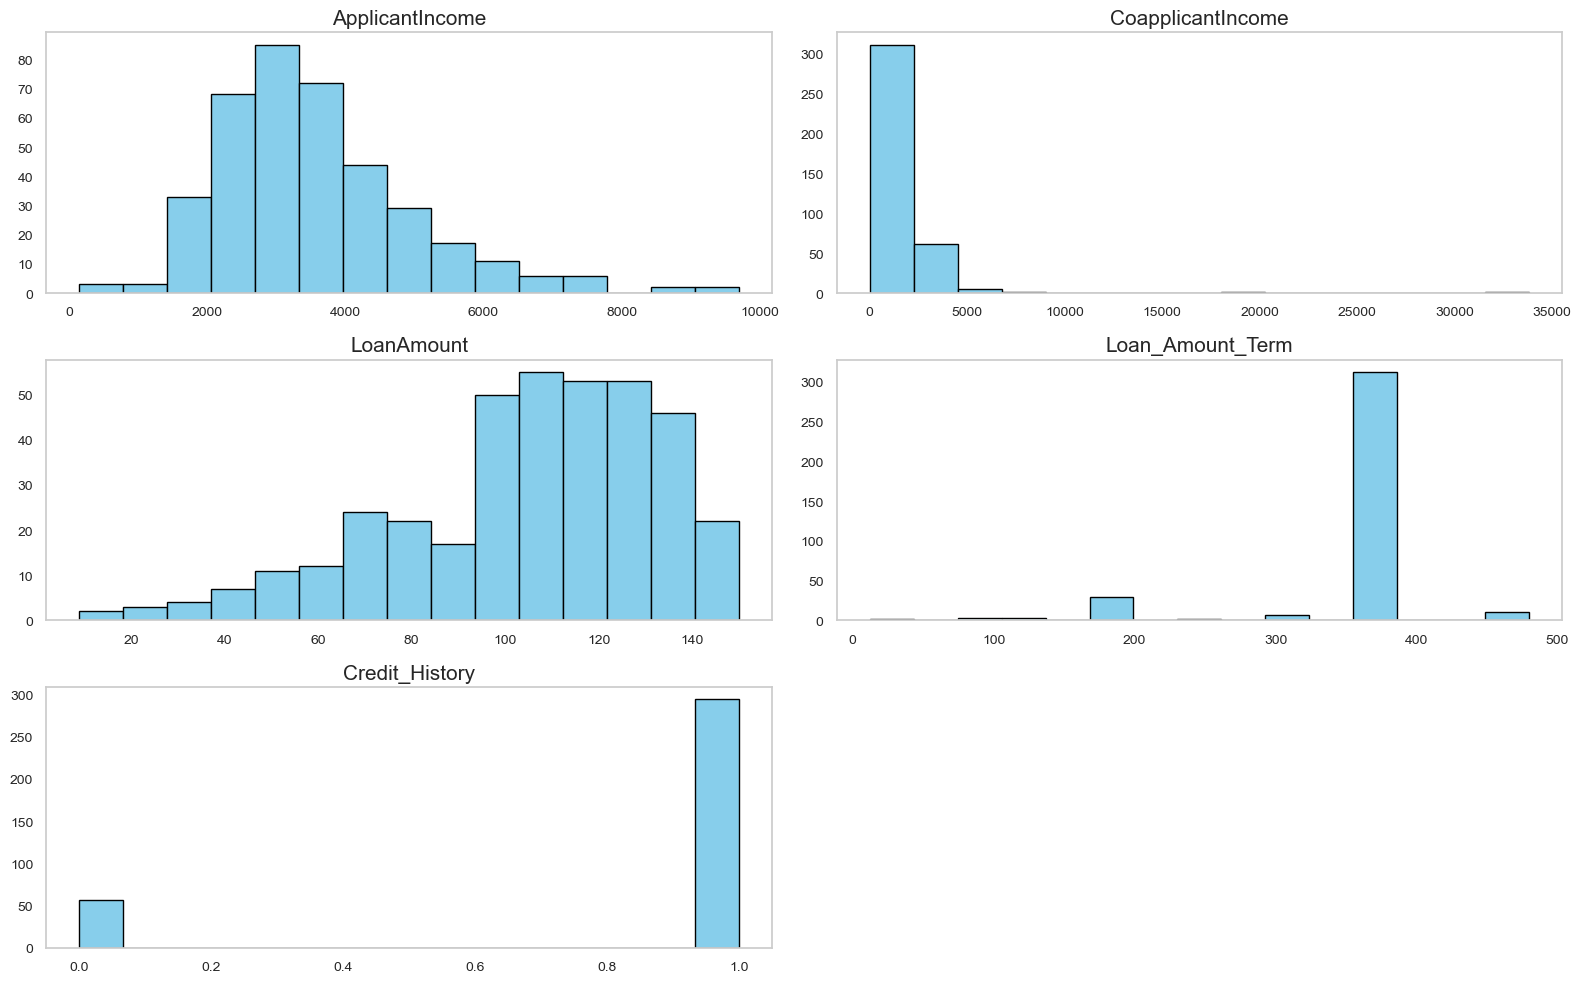

In [6]:
sns.set(style="whitegrid")
plt.rc('font', size=12)
plt.rc('axes', labelsize=13, titlesize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
prestamos.hist(bins=15, figsize=(16, 10), color='skyblue', edgecolor='black', grid=False)

# Ajuste para que no se superpongan los subplots
plt.tight_layout()
plt.show()


<Axes: ylabel='ApplicantIncome'>

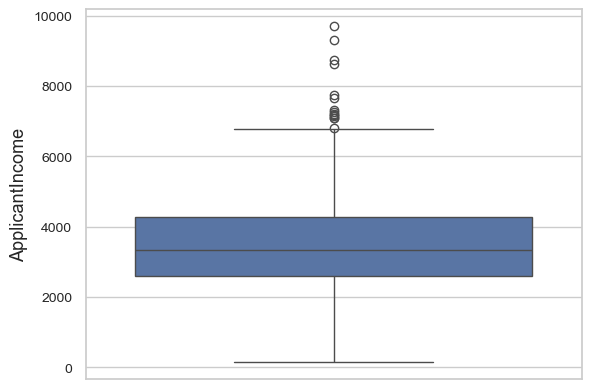

In [7]:
import seaborn as sns
sns.boxplot(data=prestamos['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

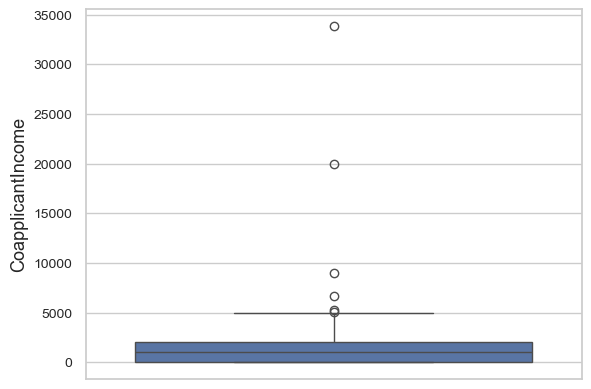

In [8]:
import seaborn as sns
sns.boxplot(data=prestamos['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

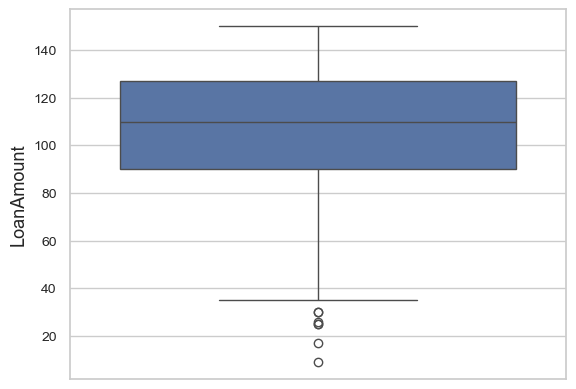

In [9]:
import seaborn as sns
sns.boxplot(data=prestamos['LoanAmount'])

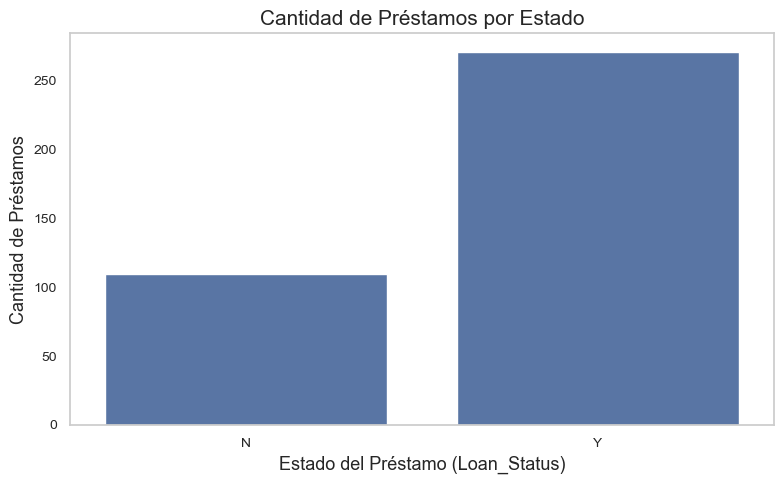

In [10]:


# Gráfico de conteo por estado del préstamo
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=prestamos)
plt.title("Cantidad de Préstamos por Estado")
plt.xlabel("Estado del Préstamo (Loan_Status)")
plt.ylabel("Cantidad de Préstamos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [11]:
prestamosM = prestamos.melt(var_name="Variable", value_name="Valor")
prestamosM

,Variable,Valor
0,Loan_ID,LP001003
1,Loan_ID,LP001005
2,Loan_ID,LP001006
3,Loan_ID,LP001008
4,Loan_ID,LP001013
...,...,...
4948,Loan_Status,Y
4949,Loan_Status,Y
4950,Loan_Status,Y
4951,Loan_Status,Y


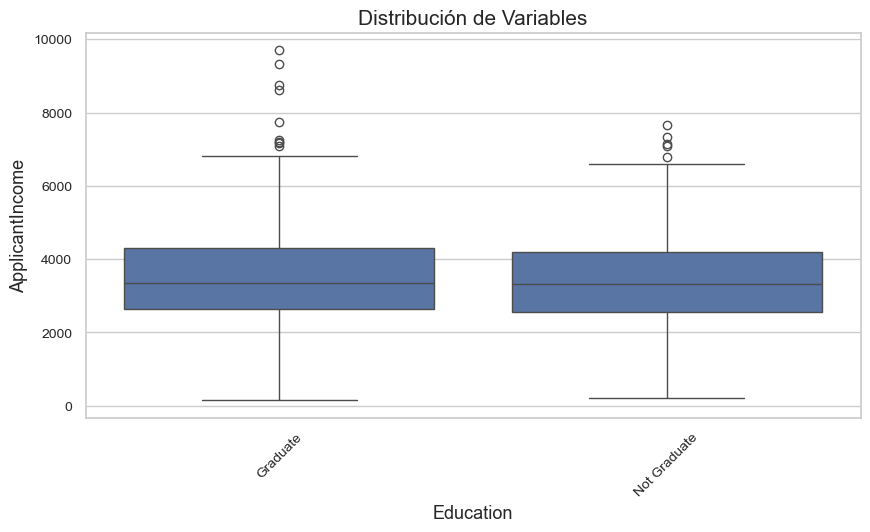

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="Education", y="ApplicantIncome", data=prestamos)
plt.title("Distribución de Variables")
plt.xticks(rotation=45)
plt.show()

In [13]:
prestamos.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

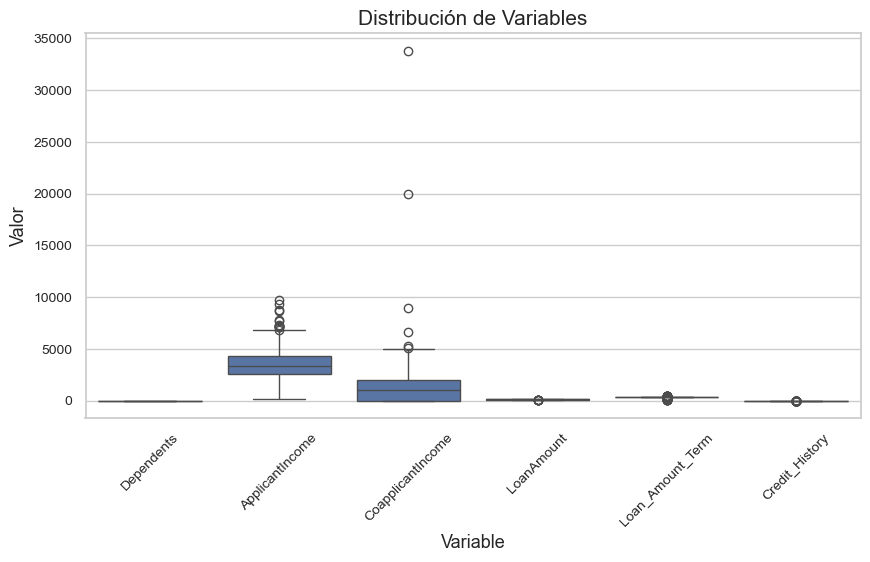

In [14]:
dfMelted = prestamos.melt(var_name="Variable", value_name="Valor")

dfMelted = dfMelted[pd.to_numeric(dfMelted["Valor"], errors="coerce").notnull()]
dfMelted["Valor"] = dfMelted["Valor"].astype(float)

dfMelted
# Generar el boxplot

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="Variable", y="Valor", data=dfMelted)
plt.title("Distribución de Variables")
plt.xticks(rotation=45)
plt.show()

In [15]:
corr_matrix = prestamos.corr(numeric_only=True)
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


In [16]:
prestamos.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [18]:

prestamos["Loan_Status_Num"] = prestamos["Loan_Status"].map({'Y': 1, 'N': 0})
corr_matrix = prestamos.corr(numeric_only=True)
corr_matrix["Loan_Status_Num"].sort_values(ascending=False)



Loan_Status_Num      1.000000
Credit_History       0.618937
LoanAmount           0.041220
CoapplicantIncome    0.009017
ApplicantIncome     -0.010167
Loan_Amount_Term    -0.047744
Name: Loan_Status_Num, dtype: float64

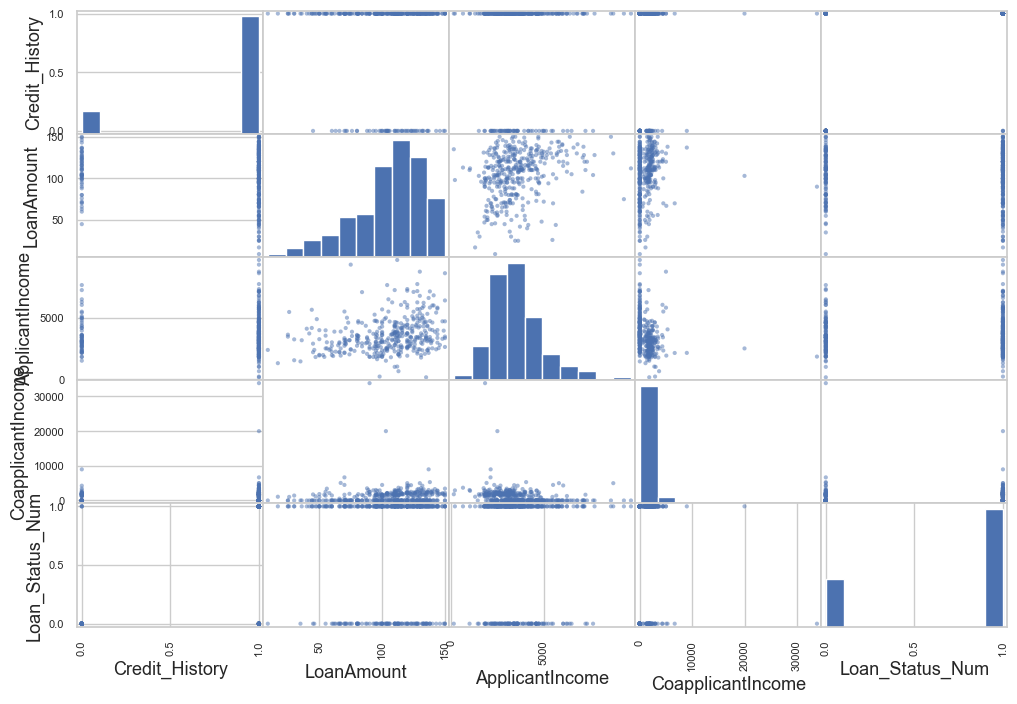

In [19]:
from pandas.plotting import scatter_matrix
 
attributes = ["Credit_History", "LoanAmount","ApplicantIncome", "CoapplicantIncome", "Loan_Status_Num"]
 
scatter_matrix(prestamos[attributes], figsize=(12, 8))
 
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
 
train_set, test_set = train_test_split(prestamos, test_size=0.2, random_state=42)
 
print('Tamaño del train_set',train_set.shape)
print('Tamaño del test_set',test_set.shape)

Tamaño del train_set (304, 14)
Tamaño del test_set (77, 14)


In [21]:
prestamos["LoanAmount"].describe()

count    381.000000
mean     104.986877
std       28.358464
min        9.000000
25%       90.000000
50%      110.000000
75%      127.000000
max      150.000000
Name: LoanAmount, dtype: float64

In [22]:
##Estratificación de los datos: cantidad del prestamo(LoanAmount)
prestamos["amount_cat"] = pd.cut(prestamos["LoanAmount"],
                                  bins = [0, 90, 110, 127, 140, np.inf],
                                 labels = [1, 2, 3, 4, 5])
prestamos

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Num,amount_cat
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,4
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,3
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,5
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,1,4
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,1,2
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1,1
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1


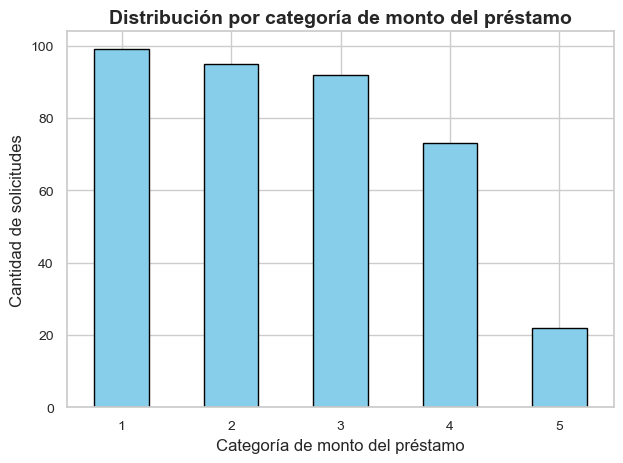

In [23]:
prestamos["amount_cat"].value_counts().sort_index().plot.bar(
    color='skyblue', edgecolor='black', rot=0, grid=True
)

plt.title("Distribución por categoría de monto del préstamo", fontsize=14, fontweight='bold')
plt.xlabel("Categoría de monto del préstamo", fontsize=12)
plt.ylabel("Cantidad de solicitudes", fontsize=12)
plt.tight_layout()
plt.show()


In [24]:
#creamos los datasets estratificados
strat_train_set, strat_test_set = train_test_split(prestamos, 
                                                   test_size=0.2, 
                                                   stratify=prestamos["amount_cat"], 
                                                   random_state=42)
 
print('Tamaño del train_set',strat_train_set.shape)
print('Tamaño del test_set',strat_test_set.shape)

Tamaño del train_set (304, 15)
Tamaño del test_set (77, 15)


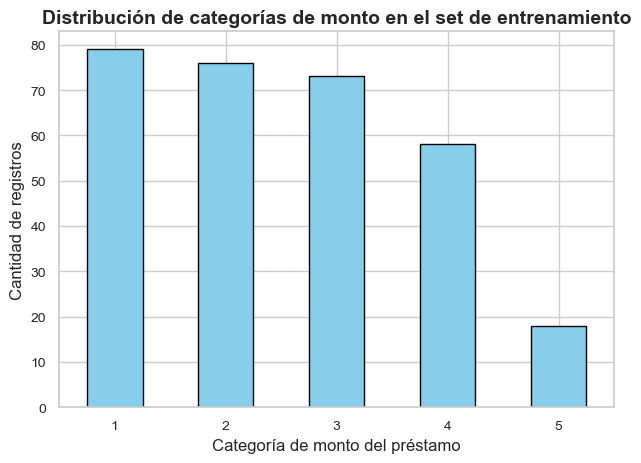

In [25]:
strat_train_set["amount_cat"].value_counts().sort_index().plot.bar( color='skyblue', edgecolor='black', rot=0, grid=True)
 
plt.title("Distribución de categorías de monto en el set de entrenamiento", fontsize=14, fontweight='bold')
plt.xlabel("Categoría de monto del préstamo", fontsize=12)
plt.ylabel("Cantidad de registros", fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
 
train_set, test_set = train_test_split(prestamos, test_size=0.2, random_state=42)
 
print('Tamaño del train_set',train_set.shape)
print('Tamaño del test_set',test_set.shape)

Tamaño del train_set (304, 15)
Tamaño del test_set (77, 15)


In [27]:
## Comparacion de sets aleatorios y estratificados
# Función calcula la proporción de cada categoría de ingreso
def amount_cat_proportions(data):
    return data["amount_cat"].value_counts() / len(data)

In [28]:
# Calcular la proporciones del training set aleatorio 
amount_cat_proportions(train_set)

amount_cat
1    0.256579
2    0.243421
3    0.240132
4    0.200658
5    0.059211
Name: count, dtype: float64

In [29]:
# Calcular la proporciones del training set aleatorio 
amount_cat_proportions(strat_train_set)

amount_cat
1    0.259868
2    0.250000
3    0.240132
4    0.190789
5    0.059211
Name: count, dtype: float64

In [30]:
compare_props = pd.DataFrame({
    "Overall %": amount_cat_proportions(prestamos),
    "Stratified %": amount_cat_proportions(strat_test_set),
    "Random %": amount_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Categoría de monto"

# Errores relativos
compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)

# Mostrar en porcentaje con 2 decimales
(compare_props * 100).round(2)


,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Categoría de monto,,,,,
1,25.98,25.97,27.27,-0.04,4.96
2,24.93,24.68,27.27,-1.04,9.38
3,24.15,24.68,24.68,2.19,2.19
4,19.16,19.48,15.58,1.67,-18.66
5,5.77,5.19,5.19,-10.04,-10.04


In [31]:
prestamos["ApplicantIncome"].describe()

count     381.000000
mean     3579.845144
std      1419.813818
min       150.000000
25%      2600.000000
50%      3333.000000
75%      4288.000000
max      9703.000000
Name: ApplicantIncome, dtype: float64

In [32]:
##Estratificación de los datos: ingresos del aplicante(ApplicantIncome)
prestamos["ingresos_cat"] = pd.cut(prestamos["ApplicantIncome"],
                                 bins = [0, 2600, 3333, 4288, 6000, np.inf],
                                   labels = [1, 2, 3, 4, 5])
prestamos

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Num,amount_cat,ingresos_cat
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,4,4
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,2
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,3,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,5,4
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,1,4,4
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,1,2,2
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1,1,2
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,3


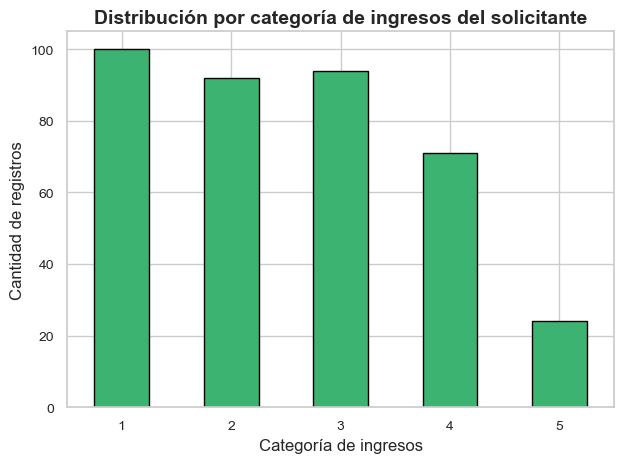

In [33]:
prestamos["ingresos_cat"].value_counts().sort_index().plot.bar(color='mediumseagreen', edgecolor='black',rot=0,grid=True)

plt.title("Distribución por categoría de ingresos del solicitante", fontsize=14, fontweight='bold')
plt.xlabel("Categoría de ingresos", fontsize=12)
plt.ylabel("Cantidad de registros", fontsize=12)
plt.tight_layout()
plt.show()


In [34]:
#creamos los datasets estratificados
strat_train_sett, strat_test_sett = train_test_split(prestamos, 
                                                   test_size=0.2, 
                                                   stratify=prestamos["ingresos_cat"], 
                                                   random_state=42)
 
print('Tamaño del train_set',strat_train_sett.shape)
print('Tamaño del test_set',strat_test_sett.shape)

Tamaño del train_set (304, 16)
Tamaño del test_set (77, 16)


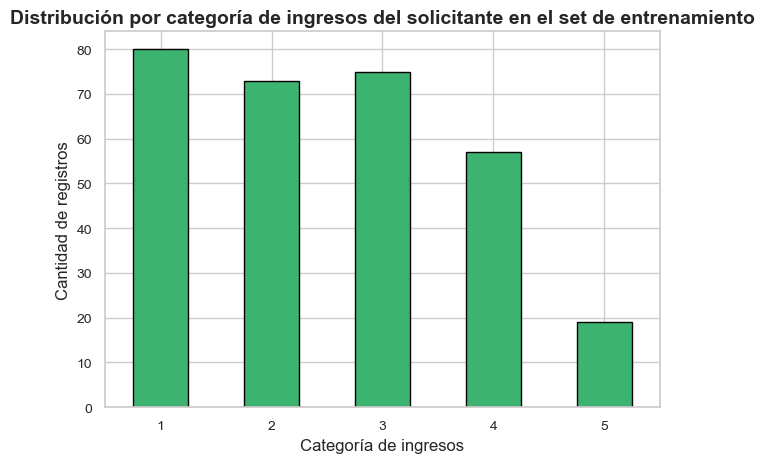

In [35]:
strat_train_sett["ingresos_cat"].value_counts().sort_index().plot.bar(color='mediumseagreen', edgecolor='black',rot=0,grid=True)
 
plt.title("Distribución por categoría de ingresos del solicitante en el set de entrenamiento", fontsize=14, fontweight='bold')
plt.xlabel("Categoría de ingresos", fontsize=12)
plt.ylabel("Cantidad de registros", fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
 
train_set, test_set = train_test_split(prestamos, test_size=0.2, random_state=42)
 
print('Tamaño del train_set',train_set.shape)
print('Tamaño del test_set',test_set.shape)

Tamaño del train_set (304, 16)
Tamaño del test_set (77, 16)


In [37]:
## Comparacion de sets aleatorios y estratificados
# Función calcula la proporción de cada categoría de ingreso
def ingresos_cat_proportions(data):
    return data["ingresos_cat"].value_counts() / len(data)

In [38]:
# Calcular la proporciones del training set aleatorio 
ingresos_cat_proportions(train_set)

ingresos_cat
3    0.263158
2    0.246711
1    0.243421
4    0.190789
5    0.055921
Name: count, dtype: float64

In [39]:
# Calcular la proporciones del training set aleatorio 
ingresos_cat_proportions(strat_train_sett)

ingresos_cat
1    0.263158
3    0.246711
2    0.240132
4    0.187500
5    0.062500
Name: count, dtype: float64

In [40]:
compare_props = pd.DataFrame({
    "Overall %": ingresos_cat_proportions(prestamos),
    "Stratified %": ingresos_cat_proportions(strat_test_sett),
    "Random %": ingresos_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Categoría de ingresos"

# Calcular errores relativos
compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)

# Mostrar como porcentaje
(compare_props * 100).round(2)


,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Categoría de ingresos,,,,,
1,26.25,25.97,33.77,-1.04,28.65
2,24.15,24.68,22.08,2.19,-8.57
3,24.67,24.68,18.18,0.01,-26.31
4,18.64,18.18,16.88,-2.43,-9.40
5,6.30,6.49,9.09,3.08,44.32


In [41]:
# Separar las variables predictivas de la variable objetivo
prestamostrain = strat_train_sett.drop("Loan_Status", axis=1)
prestamostrain_labels = strat_train_sett["Loan_Status"].copy()

In [42]:
# Forma de identificar nulos
null_rows_idx = prestamos.isnull().any(axis=1)
print(null_rows_idx[null_rows_idx == True])
prestamos.loc[null_rows_idx].head()

6      True
10     True
13     True
16     True
20     True
       ... 
354    True
361    True
366    True
370    True
375    True
Length: 73, dtype: bool


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Num,amount_cat,ingresos_cat
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,1,2,1
10,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,1,2,3
13,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,1,3,1
16,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,0,3,3
20,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,1,3,3


In [43]:
print(prestamos.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
Loan_Status_Num       0
amount_cat            0
ingresos_cat          0
dtype: int64


In [44]:
# Copia del dataset original con posibles nulos
prestamos_nulls = prestamostrain.copy()
mediana = prestamostrain["Credit_History"].median()
prestamos_nulls["Credit_History"].fillna(mediana, inplace=True)
null_rows_idx = prestamostrain["Credit_History"].isnull()
prestamos_nulls.loc[null_rows_idx].head()


C:\Users\User\AppData\Local\Temp\ipykernel_19312\1773853082.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prestamos_nulls["Credit_History"].fillna(mediana, inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Num,amount_cat,ingresos_cat
351,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,1.0,Urban,1,1,2
60,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,1.0,Semiurban,1,2,2
114,LP001643,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,1.0,Rural,1,1,1
319,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,1.0,Rural,0,4,3
161,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,1.0,Semiurban,0,4,4


In [45]:
from sklearn.impute import SimpleImputer
 
imputer = SimpleImputer(strategy="median")

In [46]:
prestamos_nulls = prestamostrain.copy()
prestamosnumericos = prestamos_nulls.select_dtypes(include=[np.number])
imputer.fit(prestamosnumericos)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [47]:
X = imputer.transform(prestamosnumericos)
X

array([[5.31600000e+03, 0.00000000e+00, 1.36000000e+02, 3.60000000e+02,
        1.00000000e+00, 1.00000000e+00],
       [3.35700000e+03, 2.85900000e+03, 1.44000000e+02, 3.60000000e+02,
        1.00000000e+00, 1.00000000e+00],
       [3.15800000e+03, 3.05300000e+03, 8.90000000e+01, 3.60000000e+02,
        1.00000000e+00, 1.00000000e+00],
       ...,
       [2.92000000e+03, 1.61200008e+01, 8.70000000e+01, 3.60000000e+02,
        1.00000000e+00, 1.00000000e+00],
       [3.18900000e+03, 2.59800000e+03, 1.20000000e+02, 3.60000000e+02,
        1.00000000e+00, 1.00000000e+00],
       [4.60000000e+03, 0.00000000e+00, 7.30000000e+01, 1.80000000e+02,
        1.00000000e+00, 1.00000000e+00]])

In [48]:
# Recuperar el dataFrame
prestamosMod = pd.DataFrame(X, columns=prestamosnumericos.columns,
                                      index=prestamosnumericos.index)
prestamosMod.loc[null_rows_idx].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Num
351,2667.0,1625.0,84.0,360.0,1.0,1.0
60,3333.0,2000.0,99.0,360.0,1.0,1.0
114,2383.0,2138.0,58.0,360.0,1.0,1.0
319,4050.0,5302.0,138.0,360.0,1.0,0.0
161,4931.0,0.0,128.0,360.0,1.0,0.0


In [49]:
presta_cat = prestamostrain[["Property_Area"]]
presta_cat.head(10)

,Property_Area
74,Urban
44,Urban
178,Rural
283,Rural
293,Rural
377,Rural
55,Urban
328,Rural
298,Urban
351,Urban


In [50]:
from sklearn.preprocessing import OrdinalEncoder
 
ordinal_encoder = OrdinalEncoder()
presta_cat_encoded = ordinal_encoder.fit_transform(presta_cat)

In [51]:
presta_cat_encoded[:10]

array([[2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.]])

In [52]:
ordinal_encoder.categories_

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [53]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

presta_cat_1hot = cat_encoder.fit_transform(presta_cat)
presta_cat_1hot
presta_cat_1hot.toarray()[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

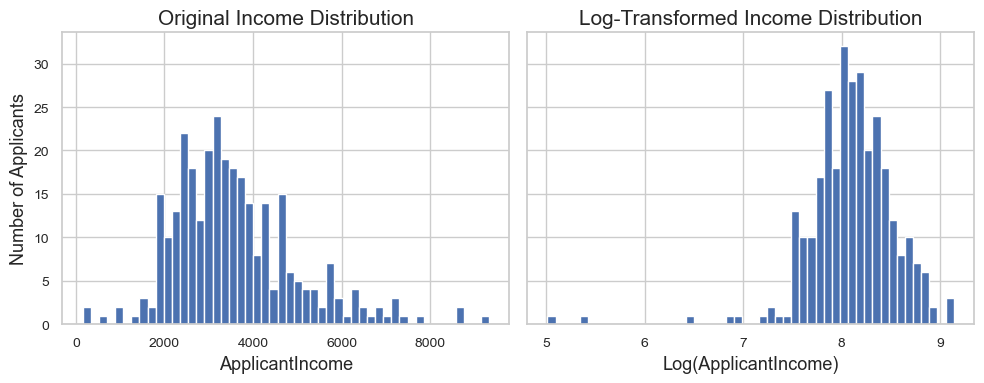

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Distribución original
prestamostrain["ApplicantIncome"].hist(ax=axs[0], bins=50)
axs[0].set_xlabel("ApplicantIncome")
axs[0].set_ylabel("Number of Applicants")
axs[0].set_title("Original Income Distribution")

# Distribución logarítmica
prestamostrain["ApplicantIncome"].apply(np.log).hist(ax=axs[1], bins=50)
axs[1].set_xlabel("Log(ApplicantIncome)")
axs[1].set_title("Log-Transformed Income Distribution")

plt.tight_layout()
plt.show()


In [55]:
corr_matrix["Loan_Status_Num"].sort_values(ascending=False)

Loan_Status_Num      1.000000
Credit_History       0.618937
LoanAmount           0.041220
CoapplicantIncome    0.009017
ApplicantIncome     -0.010167
Loan_Amount_Term    -0.047744
Name: Loan_Status_Num, dtype: float64

## Preprocesamiento

In [56]:
prestamos["ingresos_cat"] = pd.cut(prestamos["ApplicantIncome"],
                                 bins = [0, 2600, 3333, 4288, 6000, np.inf],
                                   labels = [1, 2, 3, 4, 5])

In [57]:
#creamos los datasets estratificados
from sklearn.model_selection import train_test_split
strat_train_sett, strat_test_sett = train_test_split(prestamos, 
                                                   test_size=0.2, 
                                                   stratify=prestamos["ingresos_cat"], 
                                                   random_state=42)
 
print('Tamaño del train_set',strat_train_sett.shape)
print('Tamaño del test_set',strat_test_sett.shape)

Tamaño del train_set (304, 16)
Tamaño del test_set (77, 16)


In [58]:
# Separar las variables predictivas de la variable objetivo
prestamostrain = strat_train_sett.drop("Loan_Status", axis=1)
prestamostrain_labels = strat_train_sett["Loan_Status"].copy()

In [59]:
#Estos miden la capacidad de pago del solicitante y co-solicitante en relación al préstamo
def income_to_loan(X):
    total_income = X[:, [0]] + X[:, [1]]
    return total_income / (X[:, [2]] + 1e-5)

def income_to_loan_name(transformer, feature_names_in):
    return ["income_to_loan_ratio"]
#Estos sirven para analizar la dependencia del ingreso conjunto
def applicant_to_coapplicant(X):
    return X[:, [0]] / (X[:, [1]] + 1e-5)

def applicant_to_coapplicant_name(transformer, feature_names_in):
    return ["applicant_to_coapplicant_ratio"]
#Estos se usan para ver qué porcentaje del ingreso representa el préstamo
def loan_to_income(X):
    total_income = X[:, [0]] + X[:, [1]]
    return X[:, [2]] / (total_income + 1e-5)

def loan_to_income_name(transformer, feature_names_in):
    return ["loan_to_income_ratio"]
#Estos se usan para ver la carga mensual o anual del solicitante
def loan_to_term(X):
    return X[:, [0]] / (X[:, [1]] + 1e-5)

def loan_to_term_name(transformer, feature_names_in):
    return ["loan_to_term_ratio"]

In [78]:
income_to_loan_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(income_to_loan, feature_names_out=income_to_loan_name),
    StandardScaler()
)

applicant_to_coapplicant_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(applicant_to_coapplicant, feature_names_out=applicant_to_coapplicant_name),
    StandardScaler()
)

loan_to_income_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(loan_to_income, feature_names_out=loan_to_income_name),
    StandardScaler()
)

loan_to_term_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(loan_to_term, feature_names_out=loan_to_term_name),
    StandardScaler()
)
from category_encoders import CountEncoder
# Pipeline para variables categóricas Ordinal
cat_count_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    CountEncoder()
)

# Pipeline para variables numéricas restantes
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [79]:
preprocessing = ColumnTransformer([
    ("income_to_loan", income_to_loan_pipeline, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]),
    ("applicant_to_coapplicant", applicant_to_coapplicant_pipeline, ["ApplicantIncome", "CoapplicantIncome"]),
    ("loan_to_income", loan_to_income_pipeline, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]),
    ("loan_to_term", loan_to_term_pipeline, ["LoanAmount", "Loan_Amount_Term"]),
    ("cat", cat_count_pipeline, make_column_selector(dtype_include=object))  # <-- actualizamos esto
], remainder=default_num_pipeline)

In [80]:
# Aplica el preprocesamiento automátizado
X = preprocessing.fit_transform(prestamostrain)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(304, 15)


In [81]:
prestamostrainProc = pd.DataFrame(X,
                               columns=preprocessing.get_feature_names_out(),
                               index=prestamostrain.index)
prestamostrainProc.head(2)

,income_to_loan__income_to_loan_ratio,applicant_to_coapplicant__applicant_to_coapplicant_ratio,loan_to_income__loan_to_income_ratio,loan_to_term__loan_to_term_ratio,cat__0,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,remainder__Credit_History,remainder__Loan_Status_Num,remainder__amount_cat,remainder__ingresos_cat
74,-0.352710,1.461968,0.356319,0.034177,1.0,237.0,130.0,195.0,223.0,275.0,96.0,0.400381,0.653628,1.198635,1.177683
44,-0.232557,-0.825365,0.024008,0.074821,1.0,237.0,174.0,46.0,81.0,275.0,96.0,0.400381,0.653628,1.999481,0.367693


## Regresión Lineal

In [82]:
prestamostrain_labels.describe()

count     304
unique      2
top         Y
freq      213
Name: Loan_Status, dtype: object

In [83]:
labels_pret = prestamostrain_labels.map({'Y': 1, 'N': 0})

In [91]:
# Forma 2
# Seleccionar una Regresión Lineal
from sklearn.linear_model import LinearRegression
 
# Definir un pipeline para preprocesar los datos y luego entrenar
lin_reg = make_pipeline(preprocessing, LinearRegression())
 
y = labels_pret
 
# Entrenar la regresión lineal
lin_reg.fit(prestamostrain, y)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('income_to_loan', ...), ('applicant_to_coapplicant', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [85]:
 
prestamostrain_predictions = lin_reg.predict(prestamostrain)
print('Predicciones: ', prestamostrain_predictions[:5])
print('Predicciones redondeadas: ',prestamostrain_predictions[:5].round(-2))

Predicciones:  [1. 1. 1. 1. 1.]
Predicciones redondeadas:  [0. 0. 0. 0. 0.]


In [86]:
# Errores individuales
 
error_ratios = prestamostrain_predictions[:5].round(-2) / labels_pret.iloc[:5].values - 1
 
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-100.0%, -100.0%, -100.0%, -100.0%, -100.0%


In [87]:
# Cálculo del error total como métrica de rendimiento
from sklearn.metrics import root_mean_squared_error
 
lin_rmse = root_mean_squared_error(labels_pret, prestamostrain_predictions)
lin_rmse

9.586904727560656e-15

In [77]:
prestamostrain.dtypes


Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status_Num         int64
amount_cat           category
ingresos_cat         category
dtype: object

## Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
 
forest_clf = make_pipeline(
    preprocessing,
    RandomForestClassifier(random_state=42)
)

In [93]:
from sklearn.model_selection import cross_val_predict
y_pred_forest = cross_val_predict(forest_clf, prestamostrain, prestamostrain_labels, cv=3)

In [94]:
y_pred_forest

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y

In [95]:
# Random Forest no tiene decision_function, pero si genera la probabilidad de pertenecer a cada clase. 
y_probas_forest = cross_val_predict(forest_clf, prestamostrain, prestamostrain_labels, cv=3,
                                    method="predict_proba")

In [96]:
y_probas_forest[:10]

array([[0.07, 0.93],
       [0.08, 0.92],
       [0.07, 0.93],
       [0.18, 0.82],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.8 , 0.2 ],
       [0.76, 0.24],
       [0.92, 0.08],
       [0.  , 1.  ]])

In [97]:
y_scores_forest = y_probas_forest[:, 1]

In [98]:
y_scores_forest

array([0.93, 0.92, 0.93, 0.82, 0.92, 0.99, 0.2 , 0.24, 0.08, 1.  , 0.08,
       0.93, 0.97, 0.95, 0.97, 0.22, 0.05, 0.13, 0.96, 0.24, 0.98, 0.95,
       0.92, 0.93, 0.9 , 0.07, 0.8 , 0.17, 1.  , 0.98, 0.22, 0.95, 0.99,
       0.97, 0.96, 1.  , 0.19, 0.19, 0.99, 1.  , 0.95, 0.97, 0.99, 0.98,
       0.94, 0.19, 0.89, 0.03, 0.59, 0.08, 0.95, 0.99, 1.  , 0.24, 0.2 ,
       0.88, 0.98, 0.21, 0.89, 0.98, 0.96, 0.99, 0.92, 0.12, 0.05, 0.03,
       0.24, 0.93, 0.99, 0.15, 0.99, 0.2 , 0.04, 0.04, 0.21, 0.97, 0.81,
       0.97, 0.08, 0.98, 0.12, 0.94, 0.95, 0.9 , 0.15, 1.  , 0.94, 0.9 ,
       0.99, 0.  , 0.95, 1.  , 0.98, 0.98, 0.09, 0.99, 0.09, 0.96, 0.97,
       0.97, 0.98, 0.94, 0.9 , 0.97, 0.03, 0.92, 0.95, 0.17, 0.87, 0.98,
       0.99, 0.1 , 0.94, 0.99, 0.98, 0.99, 0.12, 0.92, 0.99, 0.96, 0.94,
       0.2 , 0.97, 0.02, 0.96, 0.94, 1.  , 0.14, 0.02, 0.17, 0.83, 0.96,
       0.96, 1.  , 0.11, 0.03, 0.95, 0.97, 0.97, 0.04, 0.94, 0.89, 0.97,
       0.93, 0.99, 0.97, 0.92, 0.09, 0.65, 0.98, 0.